# SQLite3 Tutorial


# What is SQLite

SQLite is an in-process library that implements a self-contained, serverless, zero-configuration (Means do not need to enable the extra settings externally it enables all the required setting automatically), transactional SQL database engine. The code for SQLite is in the public domain and is thus free for use for any purpose, commercial or private. SQLite is the most widely deployed database in the world with more applications than we can count, including several high-profile projects.

SQLite is an embedded SQL database engine. Unlike most other SQL databases, SQLite does not have a separate server process. SQLite reads and writes directly to ordinary disk files. A complete SQL database with multiple tables, indices, triggers, and views, is contained in a single disk file. The database file format is cross-platform - you can freely copy a database between 32-bit and 64-bit systems or between big-endian and little-endian architectures. 

# Which Operations can be performed upon SQLite

As SQLite is also a database all the supported operations by the SQL Language or upon database can be performed on this. 

Below is the symbol for database files
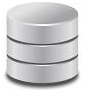

# Let's talk about some operations

# DML

DML is abbreviation of Data Manipulation Language. It is used to retrieve, store, modify, delete, insert and update data in database.

SELECT – Retrieves data from a table
INSERT -  Inserts data into a table
UPDATE – Updates existing data into a table
DELETE – Deletes all records from a table 

# DDL

DDL is abbreviation of Data Definition Language. It is used to create and modify the structure of database objects in database.

CREATE – Creates objects in the database
ALTER – Alters objects of the database
DROP – Deletes objects of the database
TRUNCATE – Deletes all records from a table and resets table identity to initial value.

# DCL

DCL is abbreviation of Data Control Language. It is used to create roles, permissions, and referential integrity as well it is used to control access to database by securing it.

GRANT – Gives user's access privileges to database
REVOKE – Withdraws user's access privileges to database given with the GRANT command 

# TCL

TCL is abbreviation of Transactional Control Language. It is used to manage different transactions occurring within a database.

COMMIT – Saves work done in transactions
ROLLBACK – Restores database to original state since the last COMMIT command in transactions
SAVE TRANSACTION – Sets a savepoint within a transaction

# Installation Proces in python

SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards.

To use sqlite3 module, first need to create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements.

# Python sqlite3 module APIs

There are many APIs We will see the essentials APIs which are required for our purpose in Data Analysis

# How to import the sqlite3

In [2]:
import sqlite3

# How to connect it with our database

In [15]:
conn = sqlite3.connect('sample.db')

There are many extensions for the database files like .db, .sqlite3, .dbase, .lenny

# Create a Table

Now we have established the connection now how to create the table into the database

file:///home/aman/Pictures/Screenshot%20from%202020-06-01%2008-55-18.png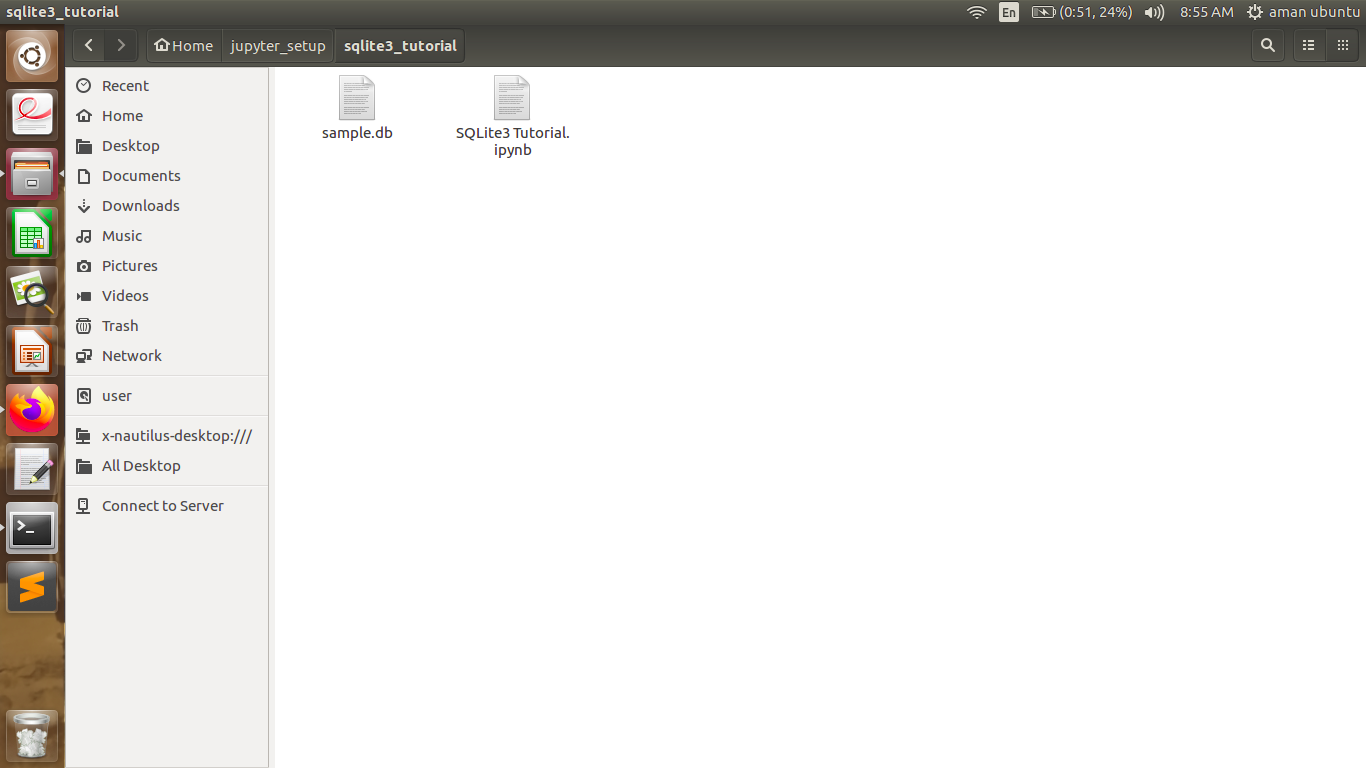

In [16]:
if conn:
    print("Database is created successfully")

Database is created successfully


Below is the structure of the database how it can be assumed logically

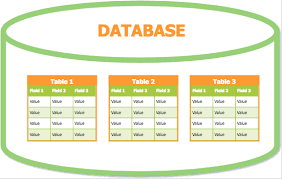

Below is the structure of the table which we will create
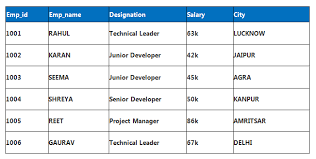

This table has four columns named Emp_id, Emp_name, Designation, Salary, City

In [17]:
if conn:
    print('Connection Established')
    conn.execute(''' CREATE TABLE IF NOT EXISTS Employee(
        Emp_id INT PRIMARY KEY NOT NULL,
        Emp_name TEXT NOT NULL,
        Designation TEXT NOT NULL,
        Salary INT NOT NULL,
        City Text NOT NULL    
    )''')

Connection Established


# Note:

There is no direct encryption of .db files for this one need to install the DB Browser for Sqlite3
https://sqlitebrowser.org/dl/

# Insert Command

Now we will insert the data into our table

In [18]:
conn.execute('''INSERT INTO Employee(Emp_id, Emp_name, Designation, Salary, City) VALUES (1, 'XYZ', 'SDE',100000,'Banglore')''')
conn.commit()

file:///home/aman/Pictures/Screenshot%20from%202020-06-01%2009-28-04.png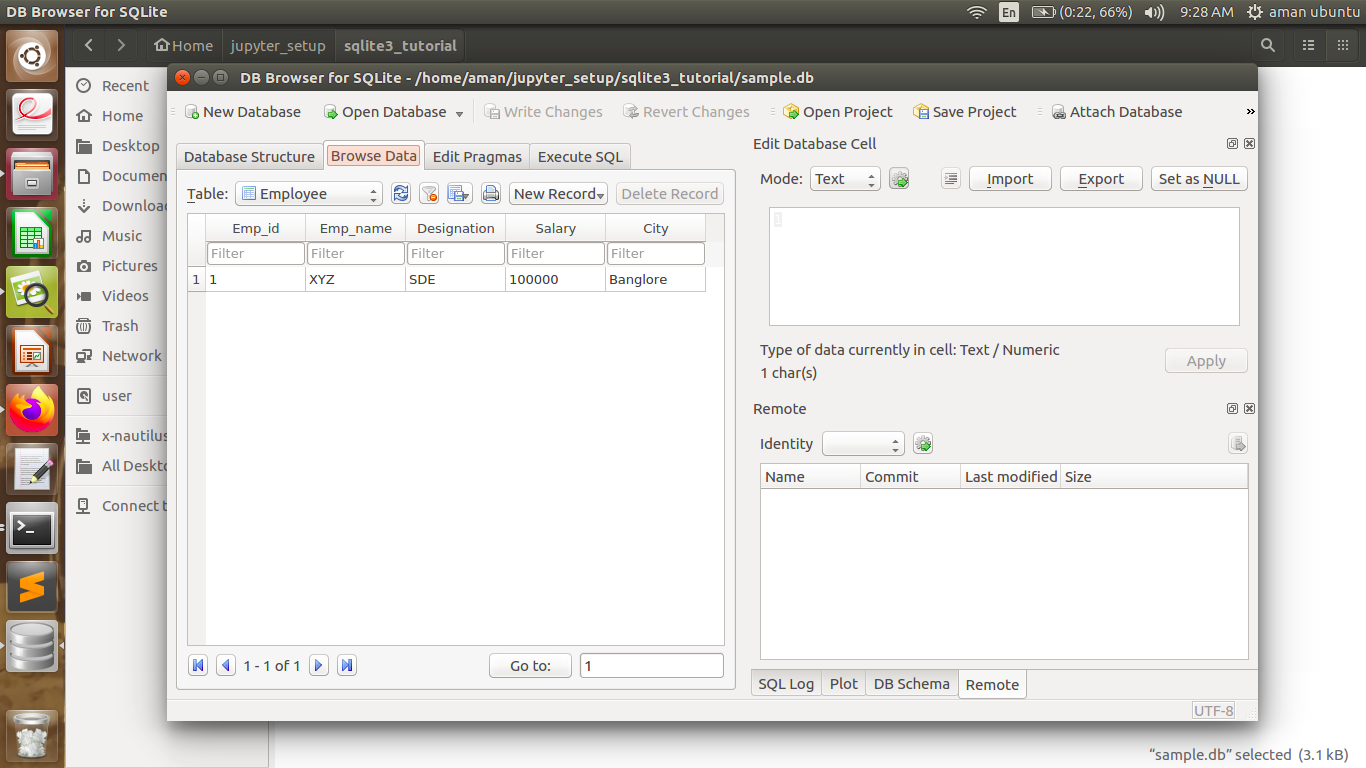

In [20]:
conn.execute('''INSERT INTO Employee(Emp_id, Emp_name, Designation, Salary, City) VALUES (2, 'ABC', 'SDE',50000,'Delhi')''')
conn.commit()

file:///home/aman/Pictures/Screenshot%20from%202020-06-01%2009-29-51.png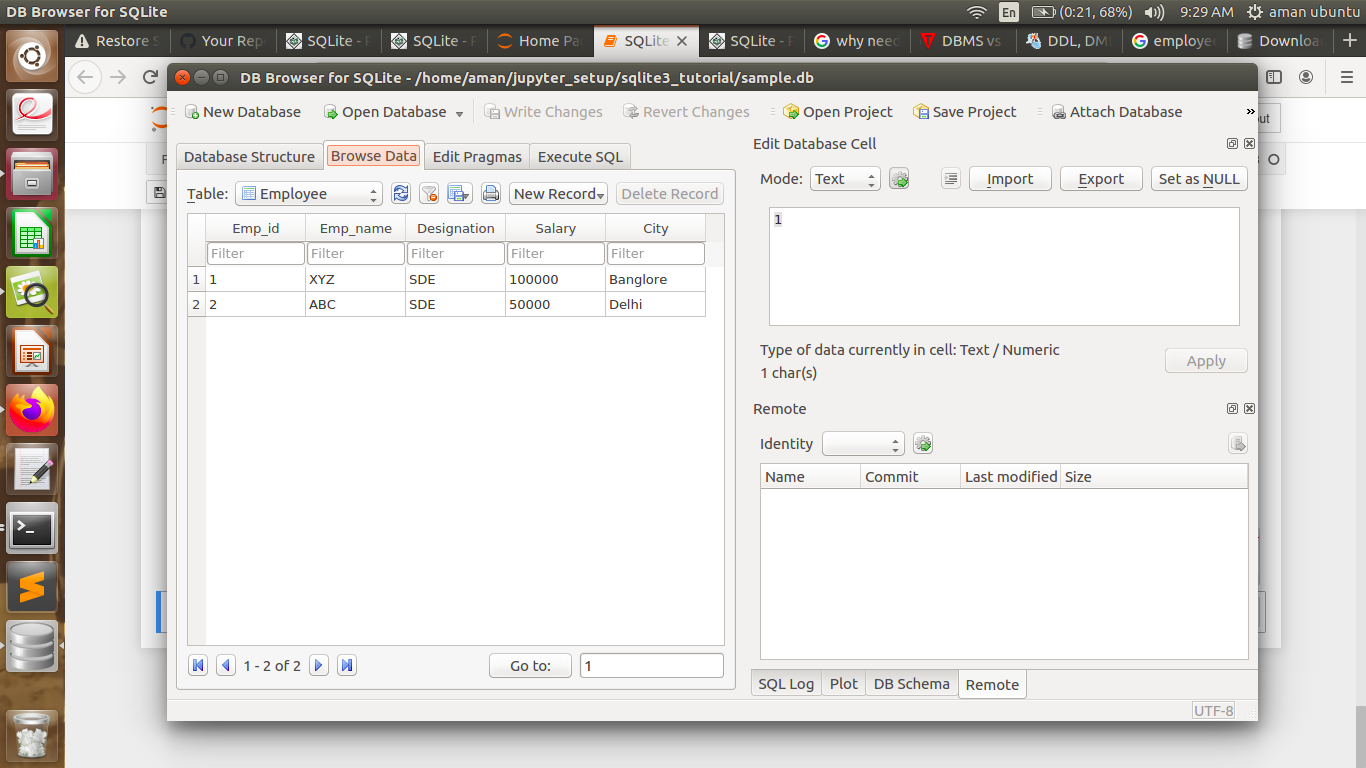

# Note:

To insert the data one can create a function for the same which is more convenient

In [21]:
def insert(conn,ID,NAME,DESIGNATION,Salary,City):
    conn.execute('''INSERT INTO Employee(Emp_id, Emp_name, Designation, Salary, City) VALUES (?,?,?,?,?)''',(ID,NAME,DESIGNATION,Salary,City))
    conn.commit()

# Reading the data

In [22]:
records = conn.execute('''SELECT * FROM Employee''')

In [23]:
for data in records:
    print(data)

(1, 'XYZ', 'SDE', 100000, 'Banglore')
(2, 'ABC', 'SDE', 50000, 'Delhi')


In [25]:
type(records)

sqlite3.Cursor

# Update the records

Now consider that 2 years are passed and XYZ Designation is changed to SDE to SDE2

In [27]:
conn.execute('''UPDATE Employee SET Designation="SDE2" WHERE Emp_id = 1''')
conn.commit()

file:///home/aman/Pictures/Screenshot%20from%202020-06-01%2009-52-57.png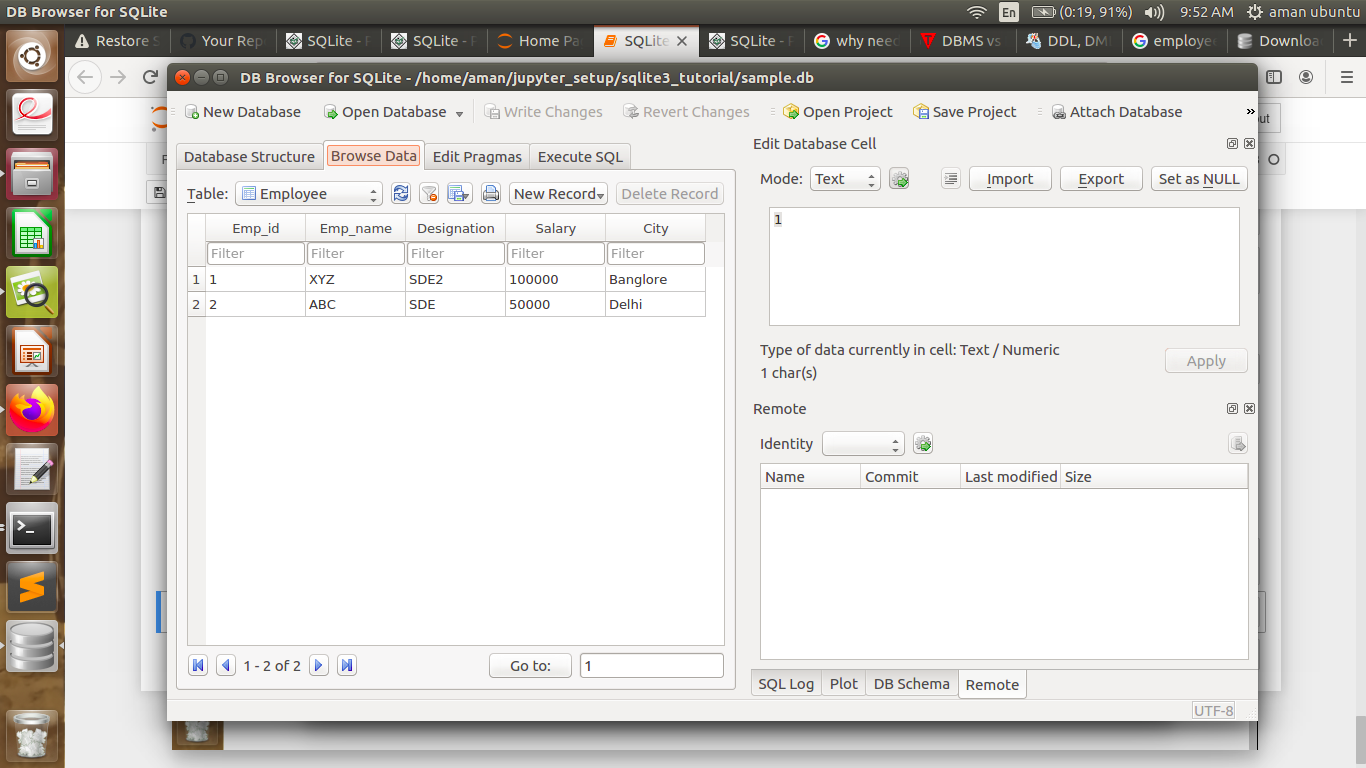

# Delete a record from a table (USE it carefully)

In [29]:
conn.execute('''Delete from Employee where Emp_id = 2''')
conn.commit()

file:///home/aman/Pictures/Screenshot%20from%202020-06-01%2009-55-03.png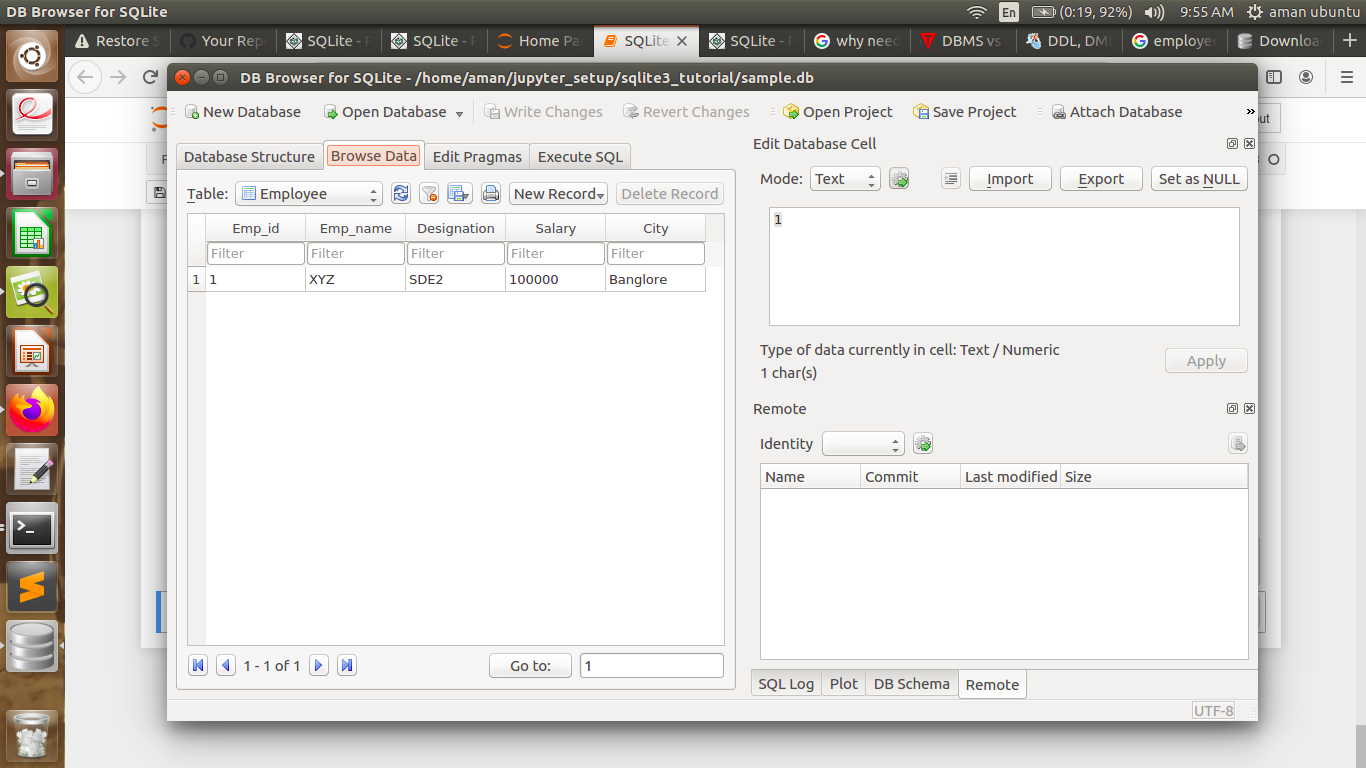

Instead of using connection object (As it might be costly operation) again and again we can create a cursor for our database

In [30]:
cursor = conn.cursor()
data = cursor.execute('''SELECT * FROM Employee''')
for data in data:
    print(data)

(1, 'XYZ', 'SDE2', 100000, 'Banglore')


In [ ]:
How to See the Schema for the table

In [31]:
Schema = cursor.execute('''PRAGMA table_info("Employee")''')

In [32]:
for r in Schema:
    print(r)

(0, 'Emp_id', 'INT', 1, None, 1)
(1, 'Emp_name', 'TEXT', 1, None, 0)
(2, 'Designation', 'TEXT', 1, None, 0)
(3, 'Salary', 'INT', 1, None, 0)
(4, 'City', 'Text', 1, None, 0)
